In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


In [4]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [5]:
train_data.shape

(8693, 14)

In [6]:
test_data.shape

(4277, 13)

In [7]:
#seperating X and Y values from train and test sets
X_train = train_data.drop('Transported', axis=1)
Y_train = train_data['Transported']


In [8]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("test_data:", test_data.shape)

X_train: (8693, 13)
Y_train: (8693,)
test_data: (4277, 13)


In [9]:
X_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


In [10]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


<Axes: >

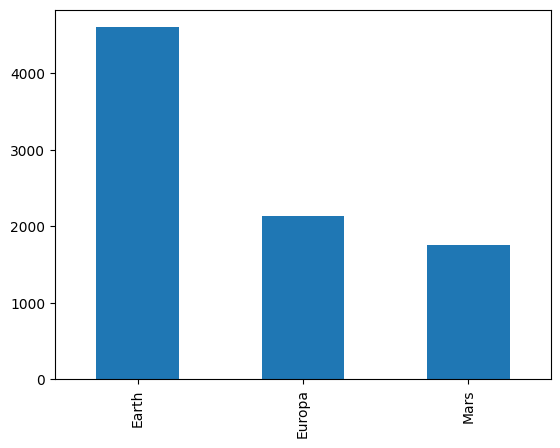

In [12]:
train_data['HomePlanet'].value_counts().plot(kind='bar')

In [13]:
planet_Number = {'Earth': 0, 'Europa': 1, 'Mars': 2}


# Use the map() function to replace non-numeric values with encoded values
train_data['Home_Planet'] = train_data['HomePlanet'].map(planet_Number)
test_data['Home_Planet'] = test_data['HomePlanet'].map(planet_Number)

In [14]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Home_Planet
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1.0


In [15]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Home_Planet
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1.0


<Axes: >

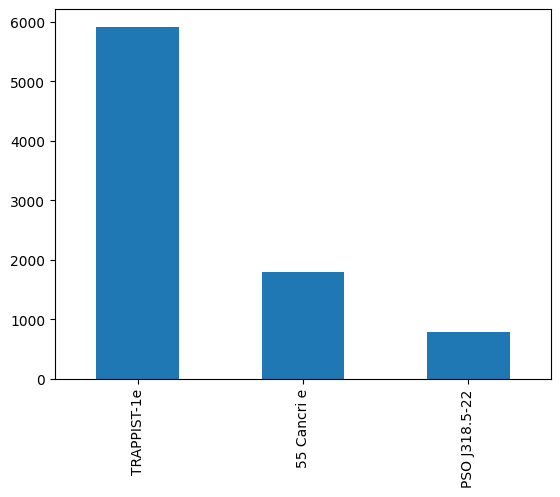

In [16]:
train_data['Destination'].value_counts().plot(kind='bar')

In [17]:
destination_Number = {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}


# Use the map() function to replace non-numeric values with encoded values
train_data['Destination_number'] = train_data['Destination'].map(destination_Number)
test_data['Destination_number'] = test_data['Destination'].map(destination_Number)


In [18]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Home_Planet,Destination_number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1.0,1.0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,2.0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0.0,0.0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1.0,1.0


In [19]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Home_Planet,Destination_number
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1.0,1.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0,0.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,0.0
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0.0,0.0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2.0,1.0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1.0,NaN


<Axes: >

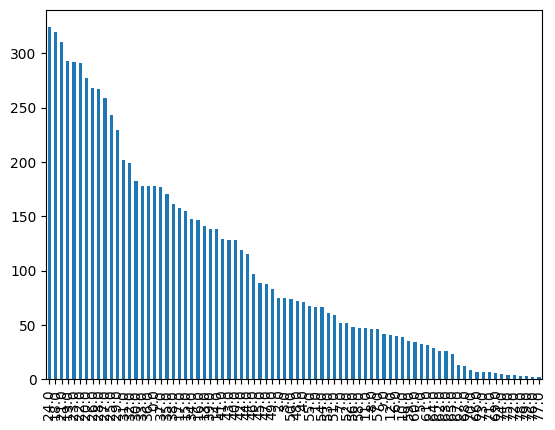

In [20]:
train_data['Age'].value_counts().plot(kind='bar')

<Axes: >

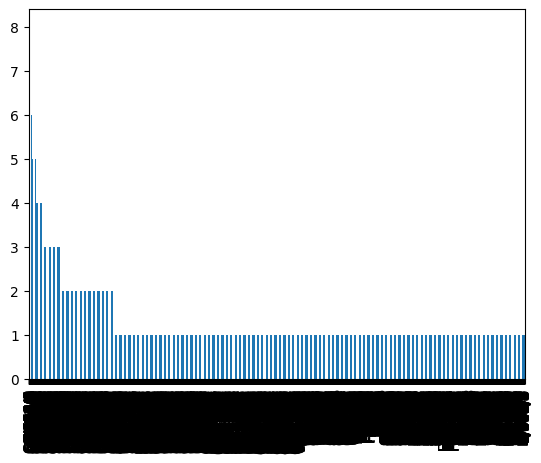

In [21]:
train_data['Cabin'].value_counts().plot(kind='bar')

<Axes: >

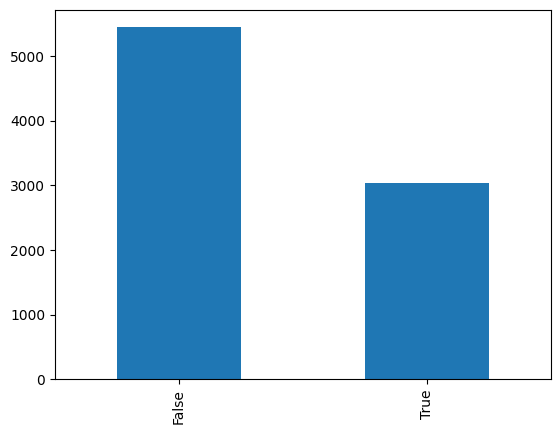

In [22]:
train_data['CryoSleep'].value_counts().plot(kind='bar')

In [23]:
train_data['VIP_numeric'] = train_data['VIP'].fillna(-1).astype(int)
train_data['CryoSleep_numeric'] = train_data['CryoSleep'].fillna(-1).astype(int)
train_data['Transported_numeric'] = train_data['Transported'].fillna(-1).astype(int)

test_data['VIP_numeric'] = test_data['VIP'].fillna(-1).astype(int)
test_data['CryoSleep_numeric'] = test_data['CryoSleep'].fillna(-1).astype(int)


In [24]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Home_Planet,Destination_number,VIP_numeric,CryoSleep_numeric,Transported_numeric
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0.0,1,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0.0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1.0,1.0,1,0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,2.0,0,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0.0,0.0,0,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1.0,1.0,0,0,0


In [25]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Home_Planet,Destination_number,VIP_numeric,CryoSleep_numeric
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0.0,0.0,0,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0.0,0.0,0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,1.0,1.0,0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0,0.0,0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,0.0,0.0,0,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0.0,0.0,0,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,2.0,1.0,0,1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,1.0,NaN,0,0


In [26]:
correlation_matrix = train_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                          Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age                  1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService          0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt            0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall         0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa                  0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck               0.101007    -0.019581   0.227995     -0.007322  0.153821   
Transported         -0.075026    -0.244611   0.046566      0.010141 -0.221131   
Home_Planet          0.138058     0.215963   0.070782      0.103070  0.055232   
Destination_number  -0.013831    -0.072975   0.025592     -0.037480  0.000111   
VIP_numeric          0.070953     0.029853   0.089942      0.027081  0.048117   
CryoSleep_numeric   -0.062649    -0.226037  -0.191130     -0.190339 -0.182918   
Transported_numeric -0.07502

<ipython-input-26-4f6ea37f4acd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


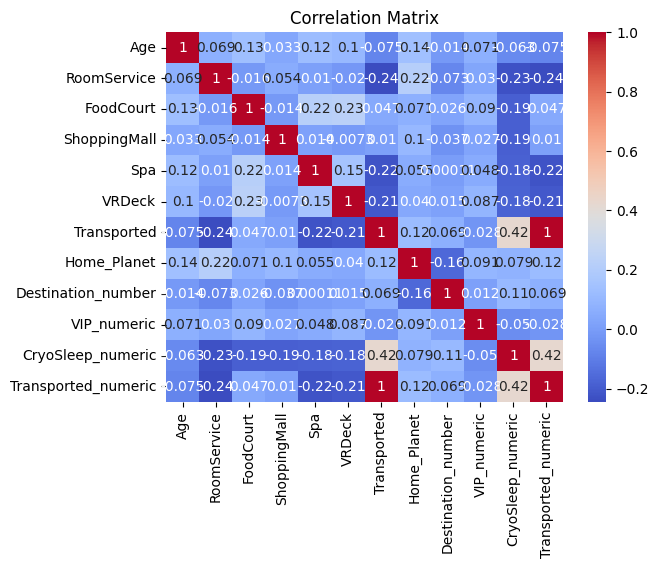

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


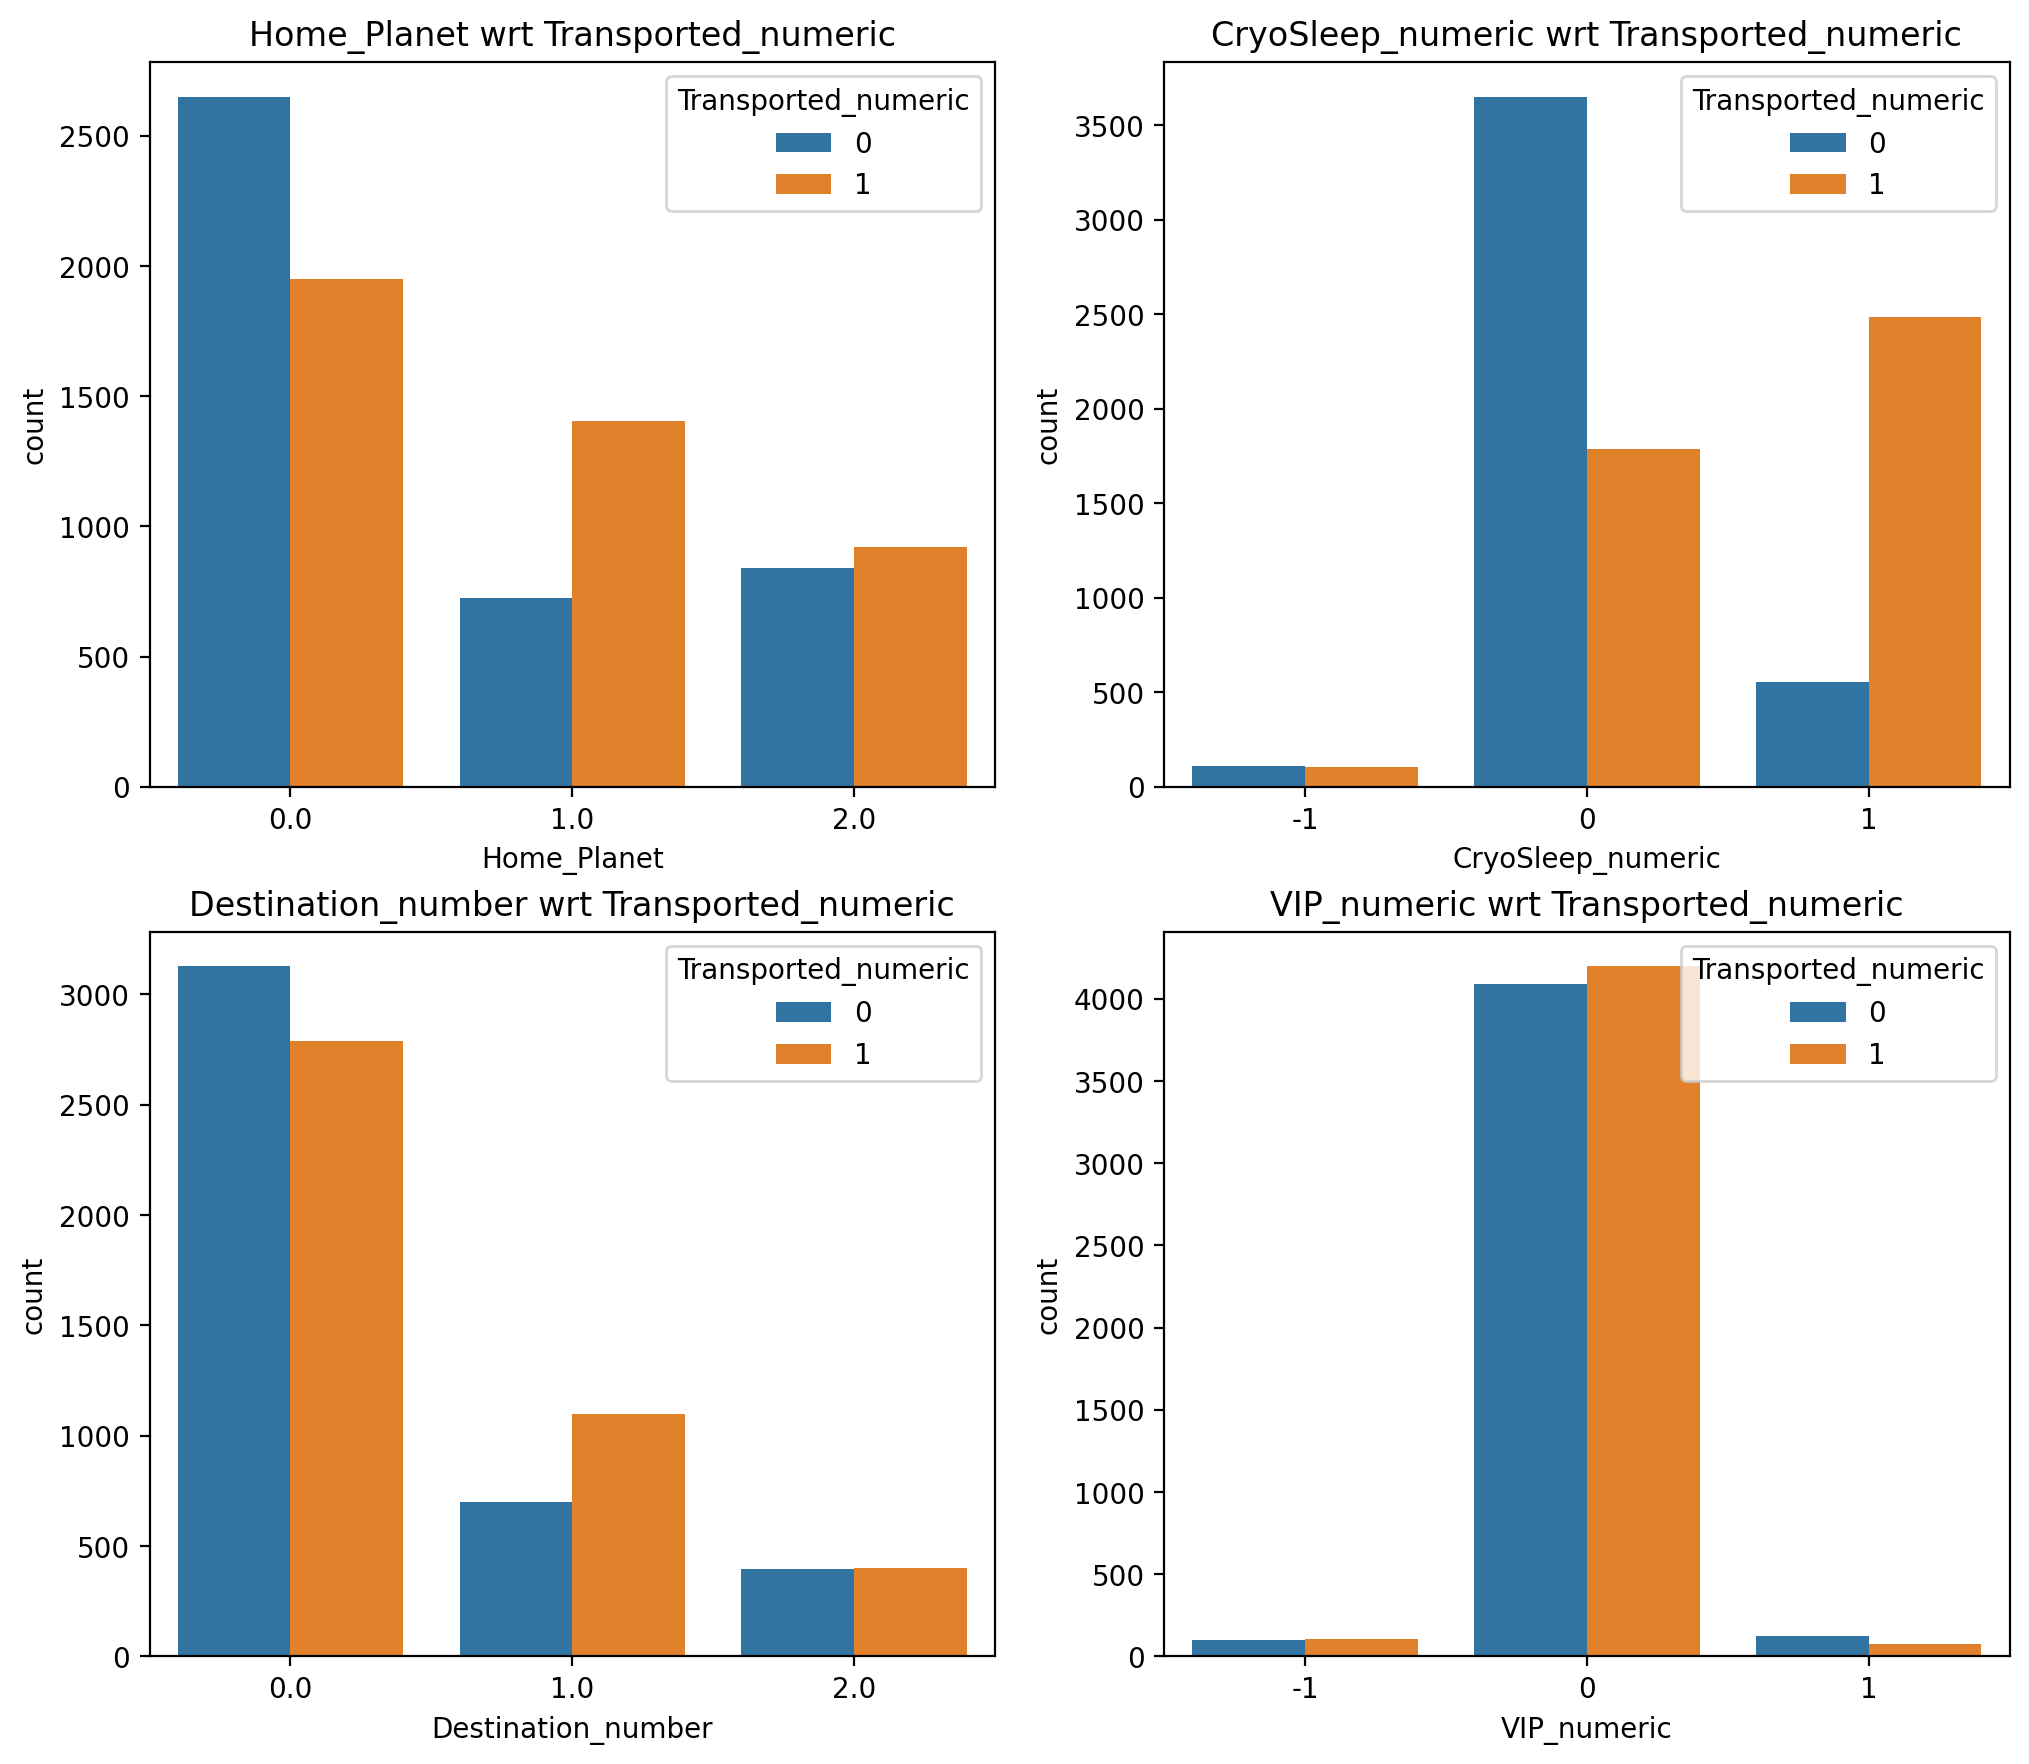

In [28]:
# Countplots for Independent Columns
cat_cols = ['Home_Planet', 'CryoSleep_numeric','Destination_number', 'VIP_numeric']
plt.figure(figsize = (12, 16), dpi = 200)
for i in range(len(cat_cols)):
    plt.subplot(3,2,i+1)
    sns.countplot(x = cat_cols[i], hue = 'Transported_numeric', data = train_data)
    plt.title(cat_cols[i] +' wrt Transported_numeric')
plt.show()

<ipython-input-29-9e73016b556c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Transported_numeric', y = num_cols[i], data = train_data,ci = None)
<ipython-input-29-9e73016b556c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Transported_numeric', y = num_cols[i], data = train_data,ci = None)
<ipython-input-29-9e73016b556c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Transported_numeric', y = num_cols[i], data = train_data,ci = None)
<ipython-input-29-9e73016b556c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x = 'Transported_numeric', y = num_cols[i], data = train_data,ci = None)
<ipython-input-29-9e73016b556c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplo

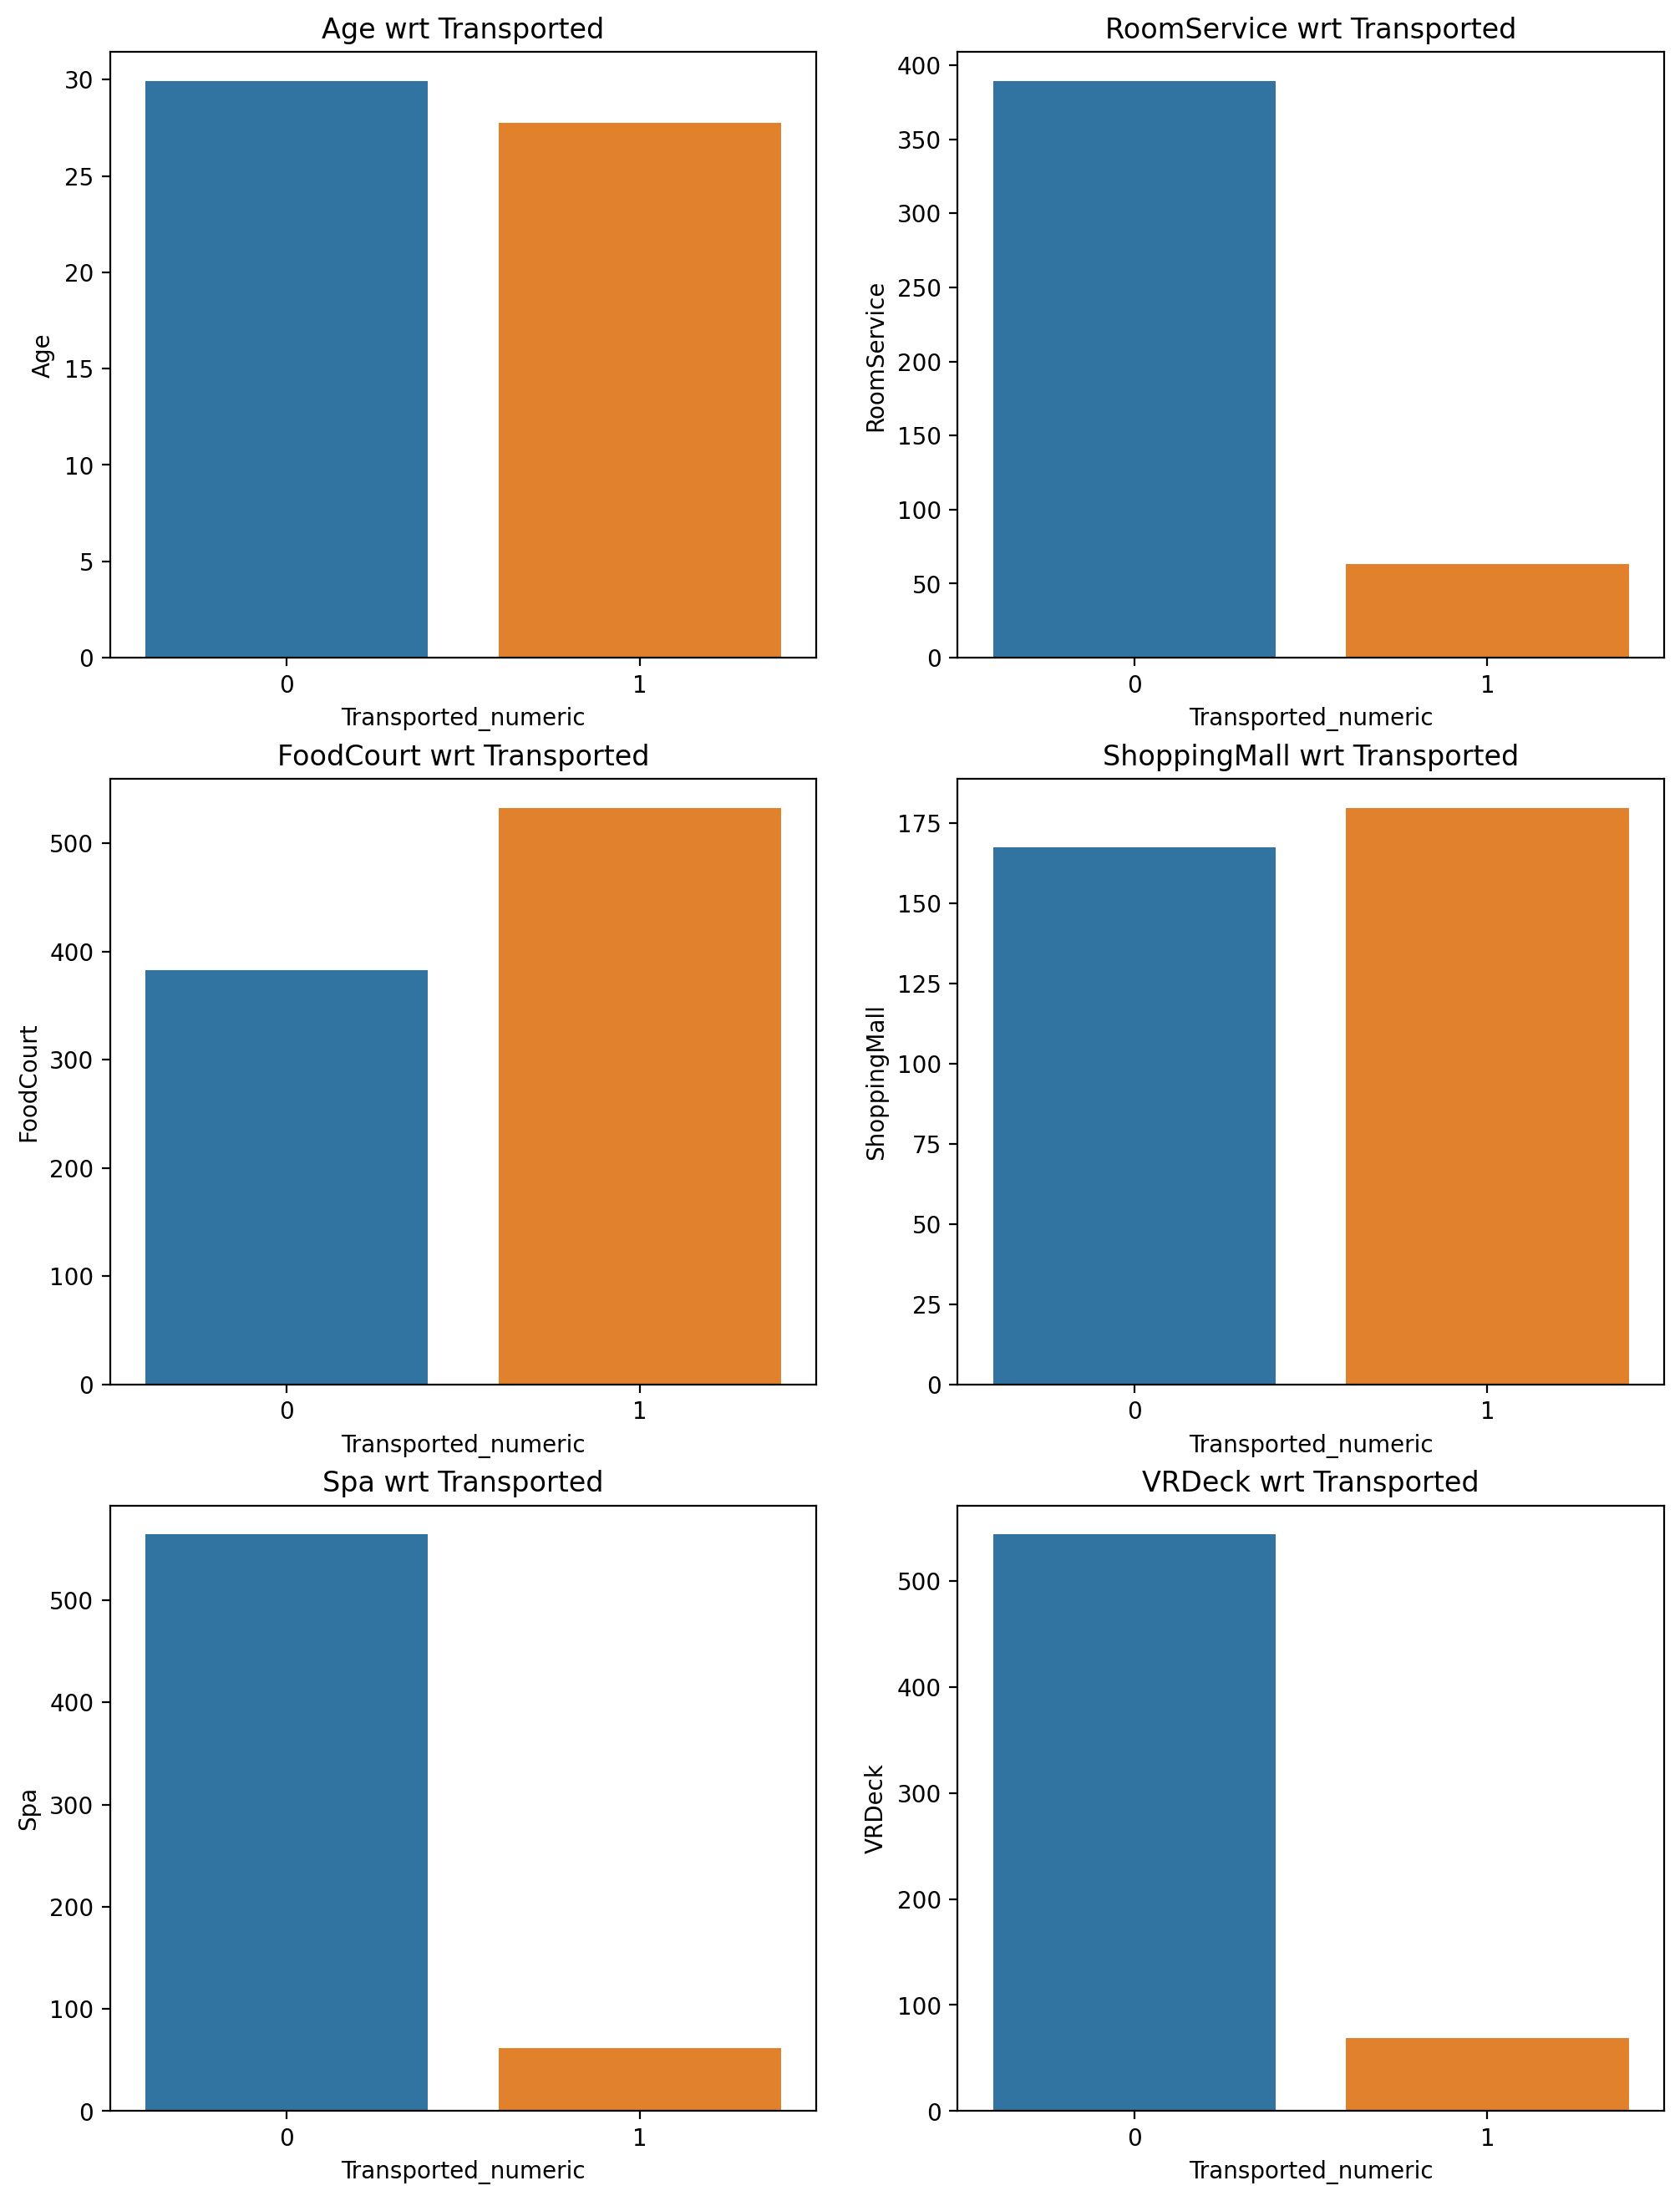

In [29]:
num_cols = ['Age',  'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
plt.figure(figsize = (12, 16), dpi = 200)
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.barplot(x = 'Transported_numeric', y = num_cols[i], data = train_data,ci = None)
    plt.title(num_cols[i] +' wrt Transported')
plt.show()


In [30]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Home_Planet,Destination_number,VIP_numeric,CryoSleep_numeric,Transported_numeric
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,0.0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0.0,0.0,0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1.0,0.0,1,0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1.0,0.0,0,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,1.0,1.0,1,0,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0.0,2.0,0,1,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0.0,0.0,0,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1.0,1.0,0,0,0


In [31]:
train_data_final = train_data

In [32]:
train_data_final = train_data_final.drop("VIP", axis=1)
train_data_final = train_data_final.drop("HomePlanet", axis=1)
train_data_final = train_data_final.drop("CryoSleep", axis=1)
train_data_final = train_data_final.drop("Transported", axis=1)
train_data_final = train_data_final.drop("Cabin", axis=1)
train_data_final = train_data_final.drop("PassengerId", axis=1)
train_data_final = train_data_final.drop("VIP_numeric", axis=1)
train_data_final = train_data_final.drop("Name", axis=1)
train_data_final = train_data_final.drop("ShoppingMall", axis=1)
train_data_final = train_data_final.drop("FoodCourt", axis=1)
train_data_final = train_data_final.drop("Destination", axis=1)



In [33]:
test_data_final = test_data

In [34]:
test_data_final = test_data_final.drop("VIP", axis=1)
test_data_final = test_data_final.drop("HomePlanet", axis=1)
test_data_final = test_data_final.drop("CryoSleep", axis=1)
test_data_final = test_data_final.drop("Cabin", axis=1)
test_data_final = test_data_final.drop("PassengerId", axis=1)
test_data_final = test_data_final.drop("VIP_numeric", axis=1)
test_data_final = test_data_final.drop("Name", axis=1)
test_data_final = test_data_final.drop("ShoppingMall", axis=1)
test_data_final = test_data_final.drop("FoodCourt", axis=1)
test_data_final = test_data_final.drop("Destination", axis=1)

In [35]:
train_data_final

,Age,RoomService,Spa,VRDeck,Home_Planet,Destination_number,CryoSleep_numeric,Transported_numeric
0,39.0,0.0,0.0,0.0,1.0,0.0,0,0
1,24.0,109.0,549.0,44.0,0.0,0.0,0,1
2,58.0,43.0,6715.0,49.0,1.0,0.0,0,0
3,33.0,0.0,3329.0,193.0,1.0,0.0,0,0
4,16.0,303.0,565.0,2.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...
8688,41.0,0.0,1643.0,74.0,1.0,1.0,0,0
8689,18.0,0.0,0.0,0.0,0.0,2.0,1,0
8690,26.0,0.0,1.0,0.0,0.0,0.0,0,1
8691,32.0,0.0,353.0,3235.0,1.0,1.0,0,0


In [36]:
test_data_final

,Age,RoomService,Spa,VRDeck,Home_Planet,Destination_number,CryoSleep_numeric
0,27.0,0.0,0.0,0.0,0.0,0.0,1
1,19.0,0.0,2823.0,0.0,0.0,0.0,0
2,31.0,0.0,0.0,0.0,1.0,1.0,1
3,38.0,0.0,181.0,585.0,1.0,0.0,0
4,20.0,10.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1
4273,42.0,0.0,10.0,144.0,0.0,0.0,0
4274,NaN,0.0,0.0,0.0,2.0,1.0,1
4275,NaN,0.0,0.0,523.0,1.0,NaN,0


In [37]:
X = train_data_final.drop('Transported_numeric',axis=1)
Y = train_data_final['Transported_numeric']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [39]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())


In [40]:
X_train.shape

(6954, 7)

In [41]:
Y_train.shape

(6954,)

In [42]:
import numpy as np
import pandas as pd

# Assuming Y_train is a pandas Series
Y_train = pd.Series(Y_train)
Y_test = pd.Series(Y_test)
Y_train_reshaped = Y_train.values.reshape(-1, 1)
Y_test_reshaped = Y_test.values.reshape(-1, 1)
print(Y_train_reshaped.shape)  # Output: (6954, 1)


(6954, 1)


In [43]:
Y_test_reshaped

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [44]:
Y_train_reshaped

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
Y_train_encoded = label_encoder.fit_transform(Y_train.ravel())
Y_test_encoded = label_encoder.fit_transform(Y_test.ravel())

# Reshape the encoded target variable
Y_train_encoded_reshaped = Y_train_encoded.reshape(-1, 1)
Y_test_encoded_reshaped = Y_test_encoded.reshape(-1, 1)


In [46]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the categorical features
X_train_encoded = ordinal_encoder.fit_transform(X_train)
X_test_encoded = ordinal_encoder.fit_transform(X_test)


In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Convert X_train_encoded and Y_train_encoded_reshaped to DataFrames
X_train_df = pd.DataFrame(X_train_encoded, columns=X_train.columns)
Y_train_df = pd.DataFrame(Y_train_encoded_reshaped, columns=['target'])

# Concatenate X_train_df and Y_train_df for dropping rows with missing values
combined_df = pd.concat([X_train_df, Y_train_df], axis=1)

# Drop rows with missing values
combined_cleaned = combined_df.dropna()

# Separate the cleaned data back into X_train_cleaned and Y_train_cleaned
X_train_cleaned = combined_cleaned.drop('target', axis=1).values
Y_train_cleaned = combined_cleaned['target'].values.reshape(-1,)

# Instantiate and fit the pipeline
pipeline.fit(X_train_cleaned, Y_train_cleaned)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_cleaned, Y_train_cleaned, cv=5)


In [48]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Convert X_train_encoded and Y_train_encoded_reshaped to DataFrames
X_test_df = pd.DataFrame(X_test_encoded, columns=X_test.columns)
Y_test_df = pd.DataFrame(Y_test_encoded_reshaped, columns=['target'])

# Concatenate X_train_df and Y_train_df for dropping rows with missing values
combined_df = pd.concat([X_test_df, Y_test_df], axis=1)

# Drop rows with missing values
combined_cleaned = combined_df.dropna()

# Separate the cleaned data back into X_train_cleaned and Y_train_cleaned
X_test_cleaned = combined_cleaned.drop('target', axis=1).values
Y_test_cleaned = combined_cleaned['target'].values.reshape(-1,)



In [49]:
# 5. Evaluate the model performance
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


Cross-Validation Scores: [0.76797386 0.78431373 0.76879085 0.7792314  0.78904334]
Average Accuracy: 0.7778706331265132


In [50]:
pipeline.fit(X_train_cleaned, Y_train_cleaned)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [51]:
test_data_final

,Age,RoomService,Spa,VRDeck,Home_Planet,Destination_number,CryoSleep_numeric
0,27.0,0.0,0.0,0.0,0.0,0.0,1
1,19.0,0.0,2823.0,0.0,0.0,0.0,0
2,31.0,0.0,0.0,0.0,1.0,1.0,1
3,38.0,0.0,181.0,585.0,1.0,0.0,0
4,20.0,10.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1
4273,42.0,0.0,10.0,144.0,0.0,0.0,0
4274,NaN,0.0,0.0,0.0,2.0,1.0,1
4275,NaN,0.0,0.0,523.0,1.0,NaN,0


In [52]:
y_pred = pipeline.predict(X_test_cleaned)

In [62]:
y_pred

array([1, 1, 1, ..., 0, 1, 0])

In [66]:
# Assuming you have the predicted values stored in y_pred
predictions = pd.DataFrame({'predicted_target_variable': y_pred})

predictions['PassengerId'] = test_data['PassengerId']
predictions['predicted_target_variable'] = predictions['predicted_target_variable'].replace({1: 'true', 0: 'false'})

# Save the predictions to a CSV file
predictions.to_csv('predictions.csv', index=False)


In [53]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(Y_test_cleaned, y_pred))
print("Classification Report:")
print(classification_report(Y_test_cleaned, y_pred))

Accuracy: 0.7015323117921386
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62       743
           1       0.65      0.90      0.75       758

    accuracy                           0.70      1501
   macro avg       0.74      0.70      0.69      1501
weighted avg       0.74      0.70      0.69      1501



In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_cleaned,Y_train_cleaned)

GradientBoostingClassifier()

In [55]:
gbc_pred_y = gbc.predict(X_test_cleaned)
print(accuracy_score(Y_test_cleaned, gbc_pred_y))

0.7115256495669554


In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_cleaned,Y_train_cleaned)

KNeighborsClassifier()

In [57]:
knn_pred_y = knn.predict(X_test_cleaned)
print(accuracy_score(Y_test_cleaned, knn_pred_y))

0.7068620919387075


In [58]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train_cleaned,Y_train_cleaned)

SVC()

In [59]:
sv_pred_y = sv.predict(X_test_cleaned)
print(accuracy_score(Y_test_cleaned, sv_pred_y))

0.7648234510326449


In [60]:
from sklearn import tree
dtr = tree.DecisionTreeClassifier()
dtr.fit(X_train_cleaned,Y_train_cleaned)

DecisionTreeClassifier()

In [61]:
dt_pred_y = dtr.predict(X_test_cleaned)
print(accuracy_score(Y_test_cleaned, dt_pred_y))

0.6528980679546968


In [61]:
y_pred = pipeline.predict(test_data)
